# Desafío - Regularización

- Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
    - El desafío se debe desarrollar de manera Individual.
    - Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío Regularización.

## Requerimientos
- En esta ocasión utilizaremos datos de la composición química de muestras de vino.
- Nuestro propósito será tratar de predecir su calidad a partir de su composición química.
- Comience su estudio realizando un breve análisis exploratorio y descriptivo:
    - Identifique el tipo de datos de cada columna.
    - Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos.
    - Encuentre la cantidad de valores faltantes en cada columna.
    - Grafique la distribución empírica de cada atributo

### Ejercicio 1: Preparación del ambiente de trabajo
- Importe las librerías básicas.
- Importe los métodos asociados a regularización.
- Importe la base de datos.

In [35]:
# Utiliza esta celda para realizar los import requeridos y lectura del set de datos
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Ejercicio 2: Análisis exploratorio
- Identifique el tipo de datos de cada columna.
- Identifique outliers univariados y multivariados.
    - Los primeros los puede encontrar realizando boxplots de cada atributo.
    - Los segundos estudiando los scatterplot entre pares de atributos.

In [7]:
# Utiliza esta celda para identificar el tipo de dato de cada columna
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Comentarios**

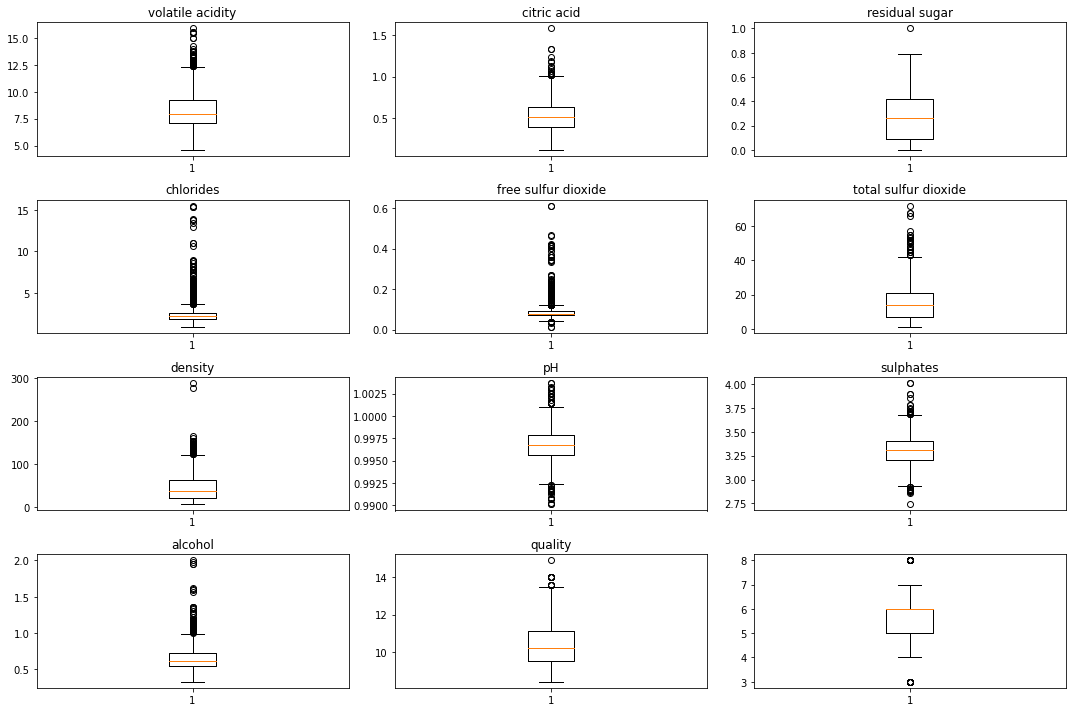

In [20]:
# Utiliza esta celda para graficar boxplots. Tip: Utilizar df.plot(subplots=True, kind="box")

#df.plot(subplots=True, kind='box', figsize=(25,7));

plt.figure(figsize=(15,10))
for i, (colname, serie) in enumerate(df.iteritems()):
    
    plt.title(colname)
    plt.subplot(4,3, i+1)
    plt.boxplot(x = serie)
    
plt.tight_layout()

**Comentarios**

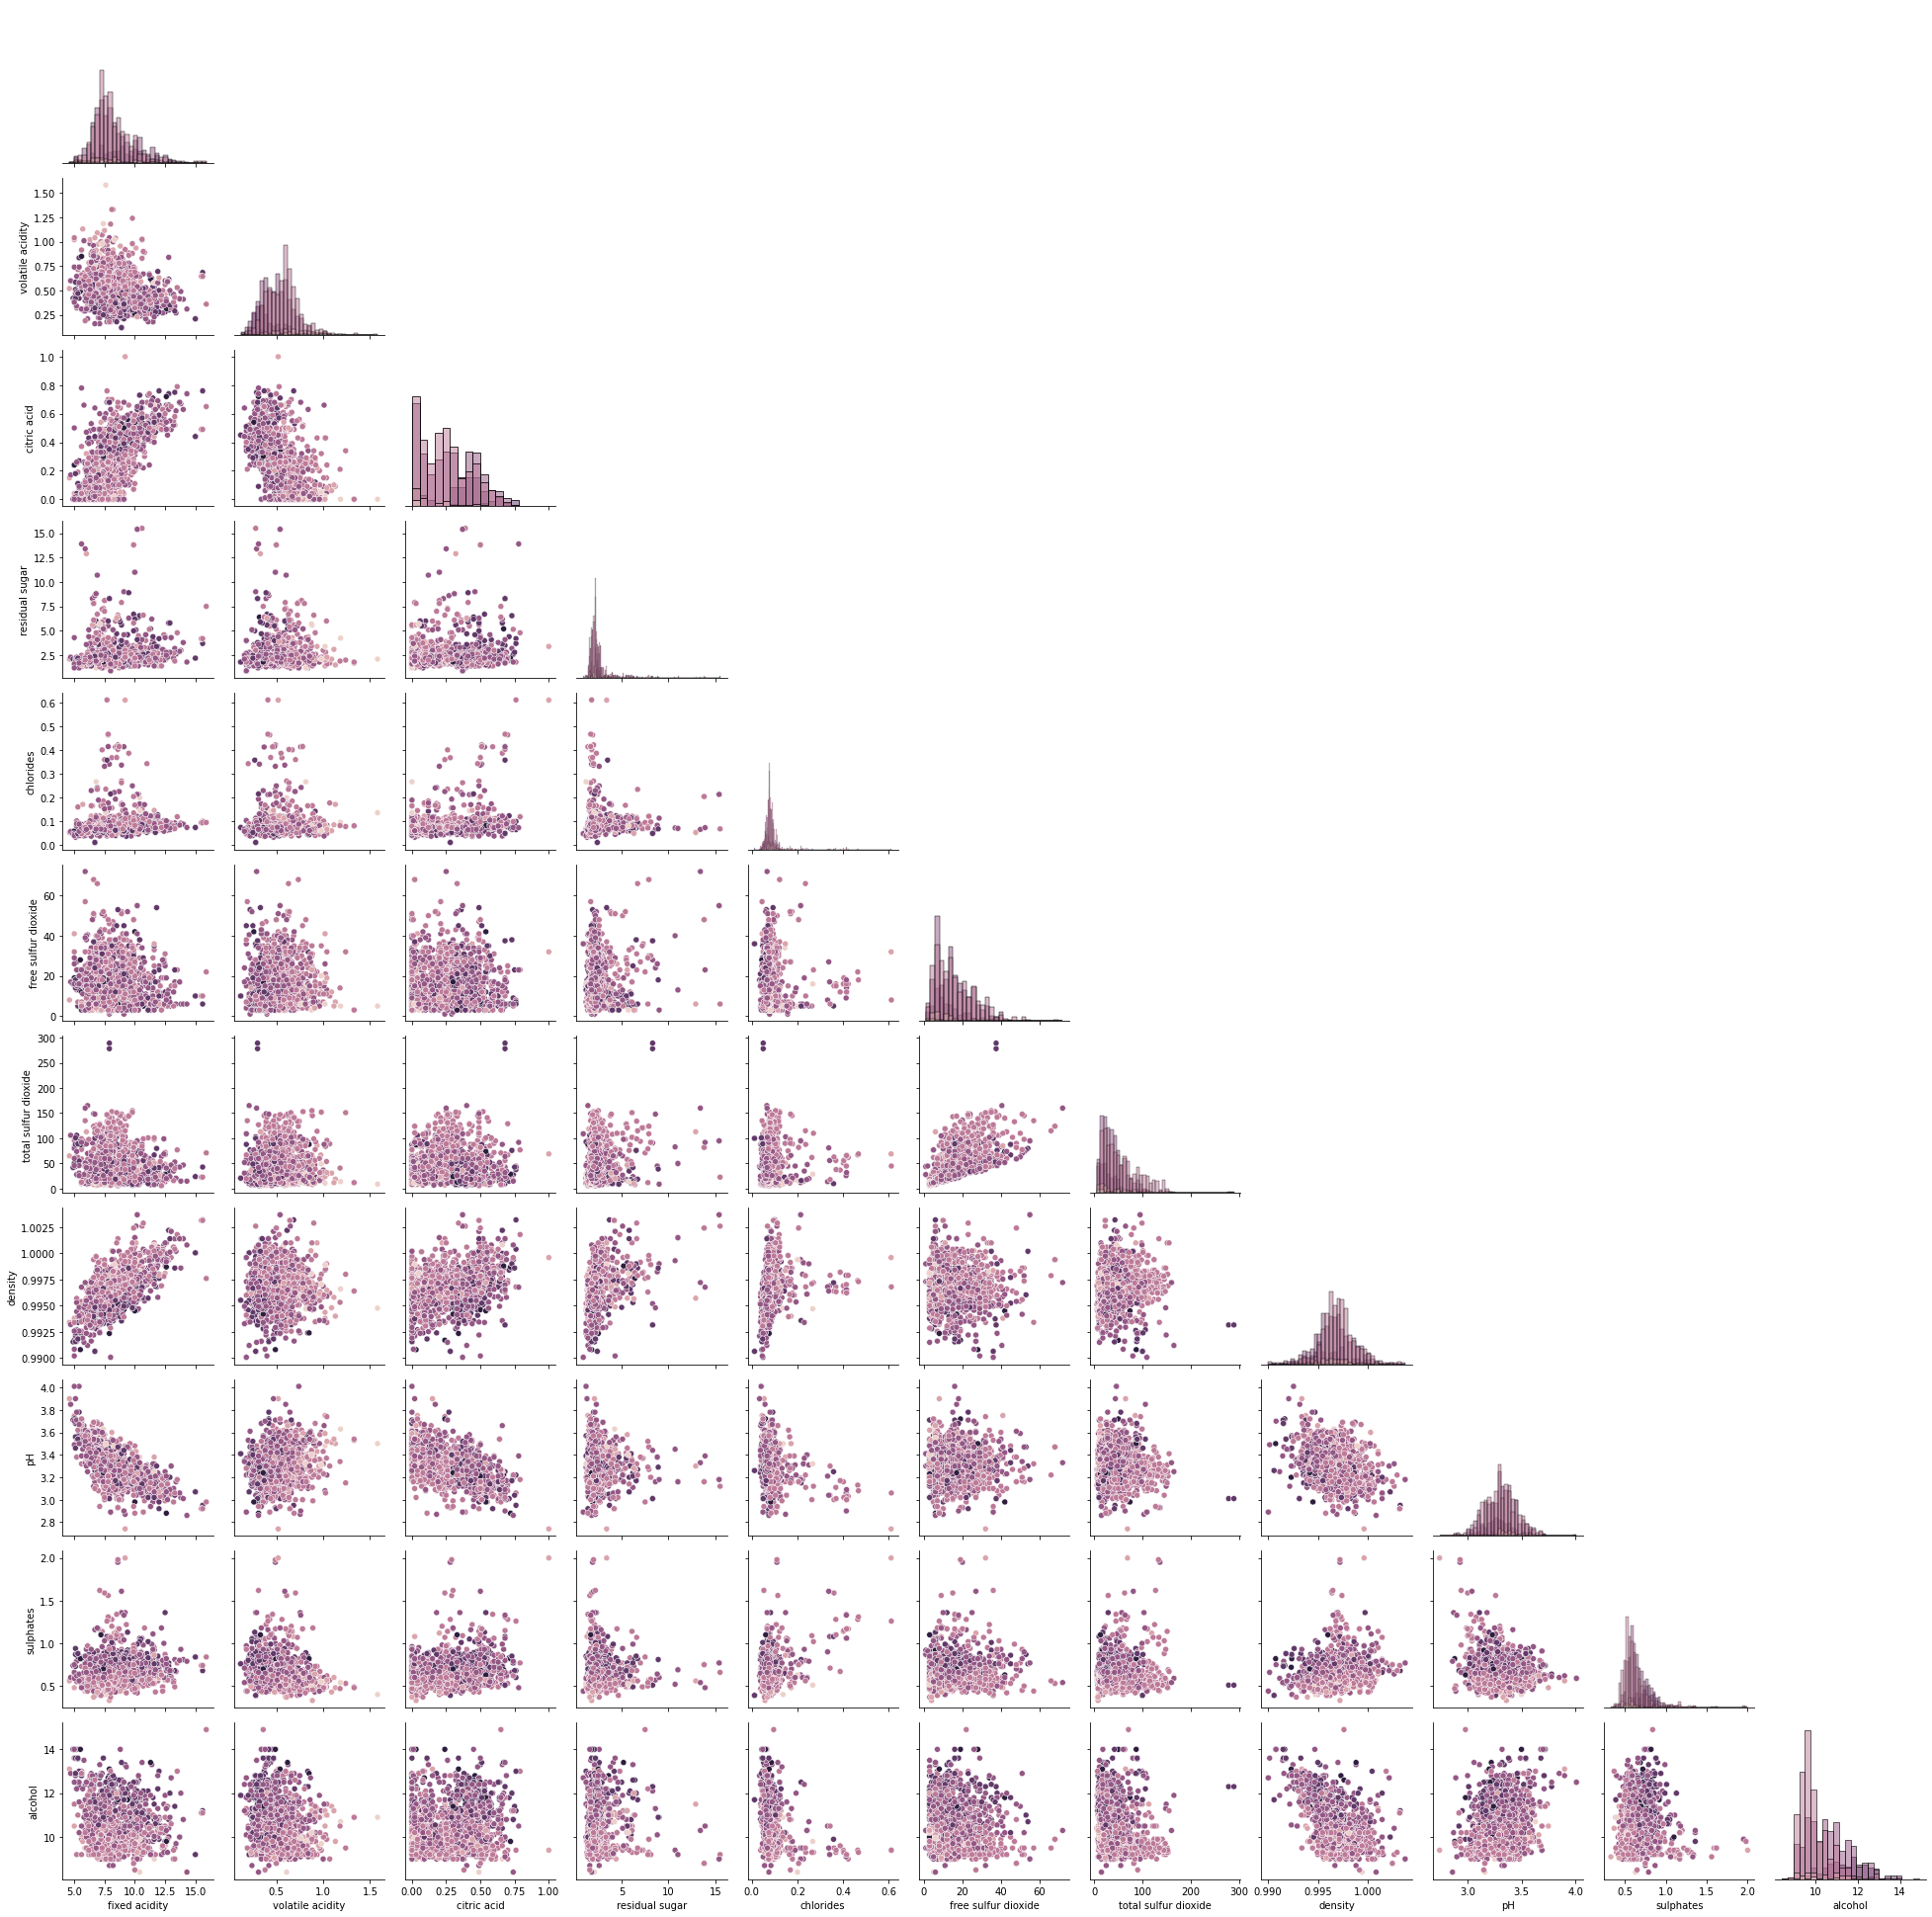

In [23]:
# Utiliza esta celda para graficar scatterplot. Tip: Utilizar pairplot de Seaborn con corner=True. Puedes usar más celdas para graficar subsets

g = sns.PairGrid(df, corner=True, hue='quality')
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot);

**Comentarios**

### Ejercicio 3: Regularización de modelos

- Genere tres modelos, correspondientes a `RidgeCV` , `LassoCV` y `ElasticNetCV`. Para cada uno de ellos implemente los siguientes pasos:
    - Entrene los modelos con 10 validaciones cruzadas.
    - Extraiga los coeficientes estimados, el mejor valor `alpha`, MAE (`median_absolute_error`) y RMSE (raiz cuadrada de `mean_squared_error`) asociado a cada modelo.

In [36]:
# Utiliza esta celda para entrenar los 3 modelos solicitados

# Divisón de muestras
X = df.drop(columns = 'quality')
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 1234)
# Estandarización

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamiento modelos
ridge = RidgeCV(cv=10).fit(X_train, y_train)
lasso = LassoCV(cv=10).fit(X_train, y_train)
enet = ElasticNetCV(cv=10).fit(X_train, y_train)

In [45]:
# Utiliza esta celda para mostrar el mejor alpha y las métricas solicitadas en los 3 modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))}')
print(f'MAE: {mean_absolute_error(y_test, ridge.predict(X_test))}')
print('#'*25)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))}')
print(f'MAE: {mean_absolute_error(y_test, lasso.predict(X_test))}')
print('#'*25)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, enet.predict(X_test)))}')
print(f'MAE: {mean_absolute_error(y_test, enet.predict(X_test))}')

RMSE: 0.6253110286500805
MAE: 0.478973107651574
#########################
RMSE: 0.6221236079972857
MAE: 0.4785132027936639
#########################
RMSE: 0.6219258898058396
MAE: 0.4786060508117335


**¿Qué modelo presenta un mejor desempeño en base a las métricas?**

**Respuesta**: Lasso

In [58]:
# Utiliza esta celda para mostrar los coeficientes de los 3 modelos. Tip: Llevarlos a un DF y usar escala de color

df_coeficientes = pd.DataFrame({'Ridge': ridge.coef_, 'Lasso': lasso.coef_, 'Enet': enet.coef_}, index = X.columns)



In [61]:
df_coeficientes.style.background_gradient(cmap='Reds')

,Ridge,Lasso,Enet
fixed acidity,0.053404,0.002797,0.004486
volatile acidity,-0.212018,-0.198365,-0.197300
citric acid,-0.045296,-0.000000,-0.000000
residual sugar,0.007698,-0.000000,-0.000000
chlorides,-0.073083,-0.066268,-0.066776
free sulfur dioxide,0.066654,0.039731,0.040582
total sulfur dioxide,-0.121606,-0.100471,-0.101174
density,-0.028366,-0.000000,-0.000000
pH,-0.061847,-0.054569,-0.053606
sulphates,0.161873,0.145857,0.145631


**¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?**

**Respuesta:**

In [68]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression().fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, modelo.predict(X_test)))

0.6259860000937448

<AxesSubplot:ylabel='Frequency'>

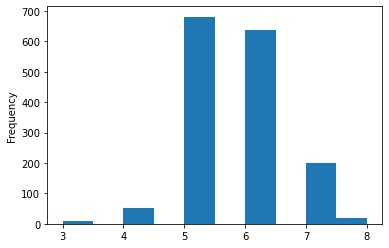

In [73]:
df.quality.plot(kind='hist')